In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from models.surface_trap import SurfaceTrap
from models.surface_trap.plot import plot_voltages_on_trap
from pytrans.analysis import analyse_potential
from pytrans.plotting.plotting import plot_potential_make_layout

from pytrans.ions import Ca40

In [4]:
trap = SurfaceTrap()
waveform = np.load('waveform.npy')

--------------
Trap potential analysis for ion Average[Ca40, Ca40]: 
Equilibrium position [um]
[99.9972  0.0003 67.0811]
Gradient [V/m]
[-0.0572  0.1038 -0.4977]
Displacement at 1 MHz [um]
[-0.0035  0.0063 -0.0304]
Hessian [V/m2]
[[ 1.6351e+07 -7.2745e+05 -5.5947e+05]
 [-7.2745e+05  6.2881e+08  7.9995e+07]
 [-5.5947e+05  7.9995e+07  5.6383e+08]]
Normal mode frequencies [MHz]
[0.99996 5.58471 6.46141]
Eigenvectors
[[1 0.00107 0.000865]
 [-0.000117 -0.558 0.83]
 [0.00137 -0.83 -0.558]]
Tilt angle of mode 2 (6.46): -146.05°
--------------
Mode solver analysis for ion crystal [Ca40, Ca40]: 
Equilibrium positions [um]
[[102.8112   0.0035  67.0835]
 [ 97.205   -0.0025  67.0787]]
Normal modes
  Freq [MHz]                   Ca40                                Ca40
------------  ----------  ---------  ----------  ----------  ----------  ---------
      0.9994   0.709       0.001034   0.0001019   0.7052      0.0004893   0.001116
      1.731    0.7052      0.001039   8.351e-05  -0.709      -0.000

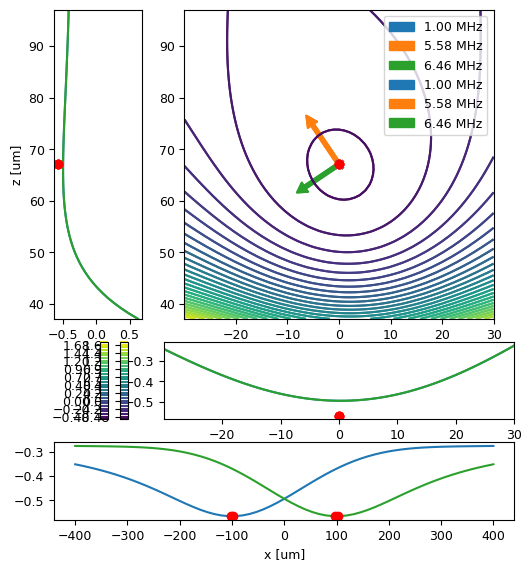

In [5]:
r0 = np.asarray((0, 0, trap.z0)) + np.random.randn(3)*1e-8

fig, axes = plot_potential_make_layout(1)
res = analyse_potential(trap, voltages=waveform[0], ions=[Ca40, Ca40], r0=r0, verbose=False, axes=axes)
res = analyse_potential(trap, voltages=waveform[-1], ions=[Ca40, Ca40], r0=r0, verbose=False, axes=axes)
res

In [6]:
from pytrans.analysis import analyse_waveform

In [7]:
results = analyse_waveform(trap, waveform, ions=[Ca40, Ca40], r0=r0)


Waveform analysis: 100%|██████████| 50/50 [00:12<00:00,  3.86it/s]


In [8]:
x_eq = np.stack([r.x_eq * 1e6 for r in results], axis=0)
freqs = np.stack([r.mode_freqs * 1e-6 for r in results], axis=0)


In [9]:
x_eq2 = np.stack([r.mode_solver_results.x_eq * 1e6 for r in results], axis=0)


In [10]:
x_eq2.shape

(50, 2, 3)

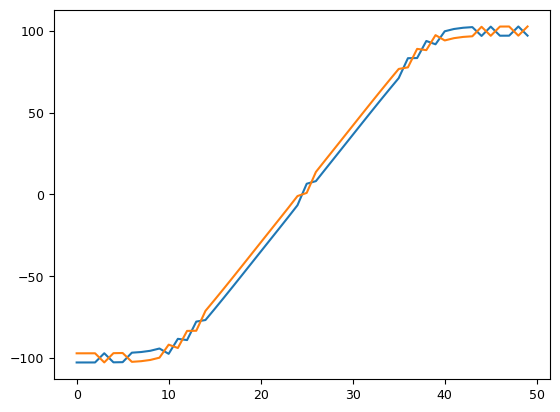

In [11]:
plt.plot(x_eq2[:, :, 0])

In [12]:
xx = x_eq[:, 0]
freqs.shape

(50, 3)

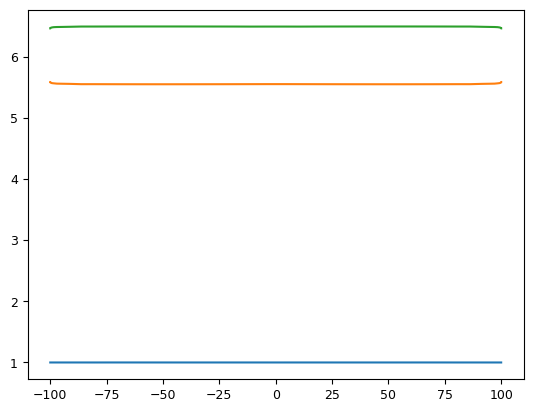

In [13]:

plt.plot(xx, freqs);

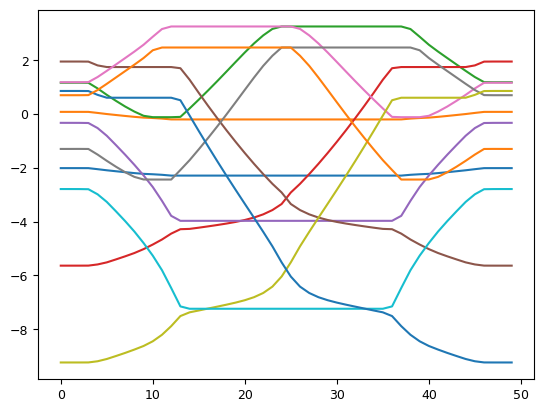

In [14]:
plt.plot(waveform); 

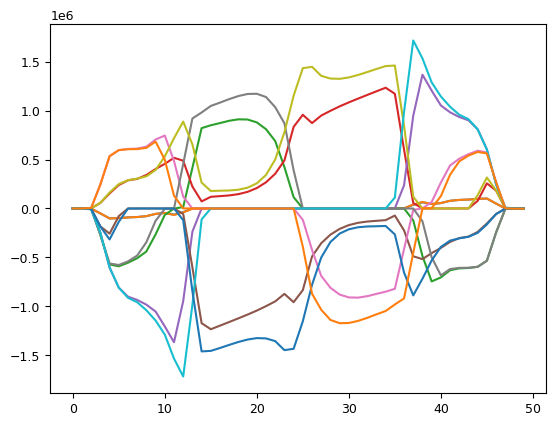

In [15]:
v_diff = np.gradient(waveform, axis=0) / trap.dt
plt.plot(v_diff);

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 600x320 -pix_fmt rgba -r 50.0 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y waveform.gif


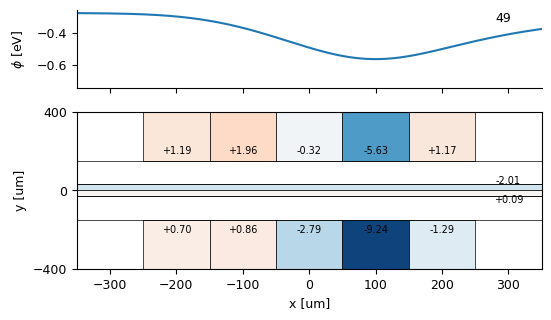

In [16]:
from models.surface_trap.plot import animate_waveform_on_trap

ani = animate_waveform_on_trap(trap, waveform)
ani.save('waveform.gif')


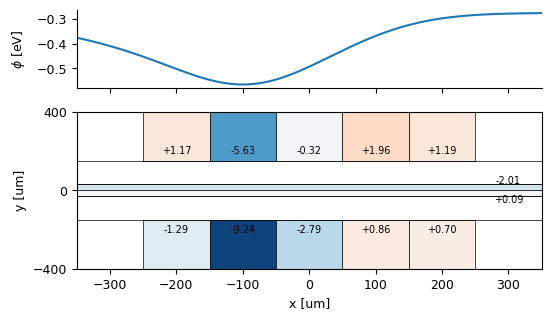

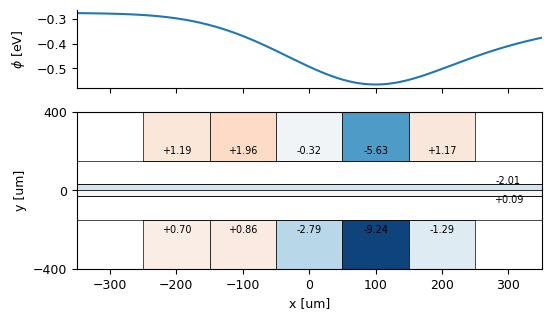

In [17]:
_ = plot_voltages_on_trap(trap, waveform[0])
_ = plot_voltages_on_trap(trap, waveform[-1])


In [18]:
r = results[0]

In [19]:
import json

rj = r.to_json()
with open('r0.json', 'w') as fp:
    json.dump(rj, fp)